### API for organic food ..

reference - https://agridata.ec.europa.eu/extensions/DataPortal/API_Documentation.html

https://agridata.ec.europa.eu/extensions/DataPortal/API_Documentation.html

##### Organic Production dashboard
https://agridata.ec.europa.eu/extensions/DashboardIndicators/OrganicProduction.html

###### Info Page
https://agridata.ec.europa.eu/Qlik_Downloads/Organic-Production-sources.htm


###### JSON and APIs with Python - 
https://towardsdatascience.com/json-and-apis-with-python-fba329ef6ef0


In [2]:
# libraries for graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# create tables
from tabulate import tabulate

#graphics for calculations
import numpy as np
import pandas as pd

#Libraries to work with json files
import requests
import json

In [7]:
# setting up the HTTP request
# create a live api link to the Europa AgriFood Dashboard for live Raw Milk price updates

raw_milk_api = requests.get('https://ec.europa.eu/agrifood/api/rawMilk/prices?products=raw%20milk')

egg_price_api = requests.get('https://ec.europa.eu/agrifood/api/poultry/egg/prices?farmingMethods=Barn,Cage')

In [12]:
# check the json data to make sure it's loaded in

#raw_milk_api.json()

#egg_price_api.json()

In [10]:
# check data was loaded in successfully

#raw_milk_api

egg_price_api

<Response [200]>

In [13]:
# convert api json data into a dataframe for processing

df_milk_prices = pd.DataFrame.from_dict(raw_milk_api.json())

#df_egg_prices = pd.DataFrame.from_dict(egg_price_api.json())

In [14]:
# show the dataframe

df_milk_prices

,memberStateCode,memberStateName,beginDate,endDate,month,monthName,price,unit,year,product
0,AT,Austria,01/12/2022,31/12/2022,12,Dec,€59.20,100KG,2022,Raw milk
1,BG,Bulgaria,01/12/2022,31/12/2022,12,Dec,€51.51,100KG,2022,Raw milk
2,CY,Cyprus,01/12/2022,31/12/2022,12,Dec,€64.42,100KG,2022,Raw milk
3,CZ,Czechia,01/12/2022,31/12/2022,12,Dec,€51.69,100KG,2022,Raw milk
4,DK,Denmark,01/12/2022,31/12/2022,12,Dec,€61.45,100KG,2022,Raw milk
...,...,...,...,...,...,...,...,...,...,...
6786,EU+UK,European Union + UK,01/03/1977,31/03/1977,3,Mar,€18.08,100KG,1977,Raw milk
6787,EU-UK,European Union,01/02/1977,28/02/1977,2,Feb,€19.05,100KG,1977,Raw milk
6788,EU+UK,European Union + UK,01/02/1977,28/02/1977,2,Feb,€18.36,100KG,1977,Raw milk
6789,EU-UK,European Union,01/01/1977,31/01/1977,1,Jan,€19.25,100KG,1977,Raw milk


In [16]:
# convert api json data into a dataframe for processing

df_egg_prices = pd.DataFrame.from_dict(egg_price_api.json())

In [17]:
# show the dataframe

df_egg_prices

,beginDate,endDate,price,unit,farmingMethod,marketingYear,memberStateCode,memberStateName
0,19/12/2022,25/12/2022,€272.52,€/100Kg,Barn,2022,AT,Austria
1,19/12/2022,25/12/2022,€269.37,€/100Kg,Cage,2022,BE,Belgium
2,19/12/2022,25/12/2022,€289.98,€/100Kg,Barn,2022,BE,Belgium
3,19/12/2022,25/12/2022,€237.61,€/100Kg,Cage,2022,BG,Bulgaria
4,19/12/2022,25/12/2022,€255.16,€/100Kg,Barn,2022,BG,Bulgaria
...,...,...,...,...,...,...,...,...
32508,06/01/1997,12/01/1997,€99.11,€/100Kg,Cage,1997,NL,Netherlands
32509,06/01/1997,12/01/1997,€84.26,€/100Kg,Cage,1997,PT,Portugal
32510,06/01/1997,12/01/1997,€124.99,€/100Kg,Cage,1997,ES,Spain
32511,06/01/1997,12/01/1997,€102.38,€/100Kg,Cage,1997,SE,Sweden


In [19]:
df_egg_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   beginDate        32513 non-null  object
 1   endDate          32513 non-null  object
 2   price            32513 non-null  object
 3   unit             32513 non-null  object
 4   farmingMethod    32513 non-null  object
 5   marketingYear    32513 non-null  int64 
 6   memberStateCode  32513 non-null  object
 7   memberStateName  32513 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.0+ MB


In [90]:
# remove the '€' from each row in the 'price' column

df['price'] = df['price'].str[1:]


In [94]:
# convert price to a float from type object

df['price'] = df['price'].astype(float)

In [95]:
# show the unique values in each column in the dataframe
df.nunique()

memberStateCode      30
memberStateName      30
beginDate           552
endDate             552
month                12
monthName            12
price              2481
unit                  1
year                 46
product               1
dtype: int64

Text(0.5, 1.0, 'Histogram - data of milk prices against year')

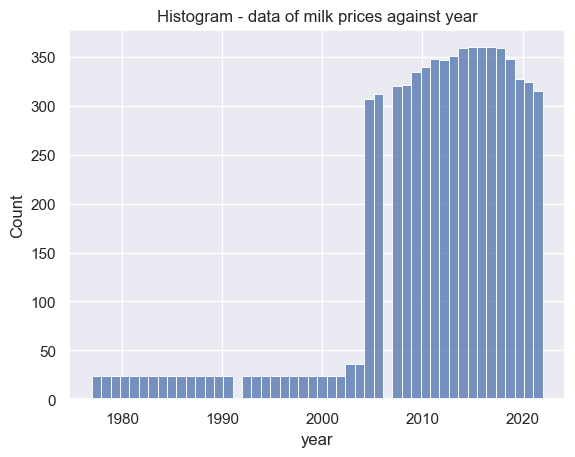

In [96]:
sns.histplot(data=df, x="year")
plt.title("Histogram - data of milk prices against year")

In [97]:
# filter on the data so only data after and including 2012 is used
# this mirrors the dataframe for EDA / Stats and Machine Learning

yr_2012_plus = df[df['year'] >= 2012]

print(yr_2012_plus)

     memberStateCode      memberStateName   beginDate     endDate  month  \
0                 AT              Austria  01/12/2022  31/12/2022     12   
1                 BG             Bulgaria  01/12/2022  31/12/2022     12   
2                 CY               Cyprus  01/12/2022  31/12/2022     12   
3                 CZ              Czechia  01/12/2022  31/12/2022     12   
4                 DK              Denmark  01/12/2022  31/12/2022     12   
...              ...                  ...         ...         ...    ...   
3806              SK             Slovakia  01/01/2012  31/01/2012      1   
3807              SI             Slovenia  01/01/2012  31/01/2012      1   
3808              ES                Spain  01/01/2012  31/01/2012      1   
3809              SE               Sweden  01/01/2012  31/01/2012      1   
3810              UK  UK up to 01/02/2020  01/01/2012  31/01/2012      1   

     monthName  price   unit  year   product  
0          Dec  59.20  100KG  2022  Raw 

Text(0.5, 1.0, 'Plot of milk units by member state countries from 2012')

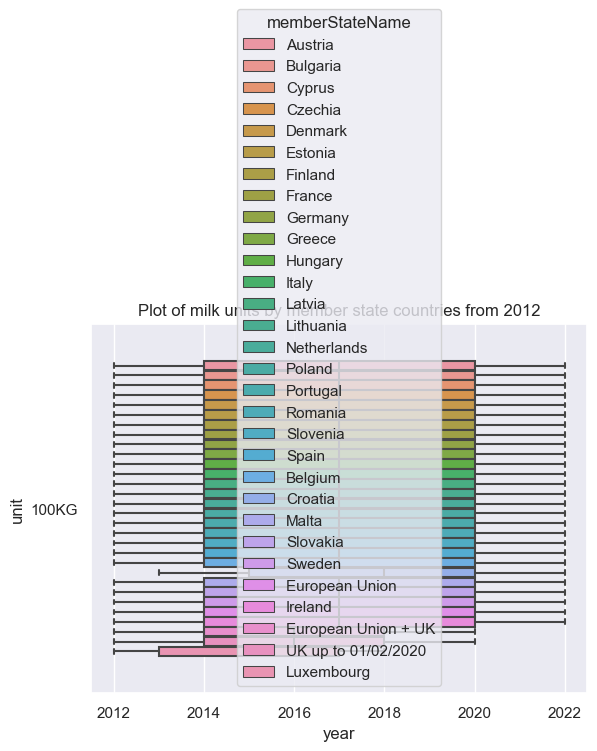

In [102]:
#sns.histplot(data=yr_2012_plus, x="year")
sns.boxplot(data=yr_2012_plus, x='year', y='unit',hue='memberStateName')
plt.title("Plot of milk units by member state countries from 2012")

Text(0.5, 1.0, 'Plot of milk prices from 2012 by unit')

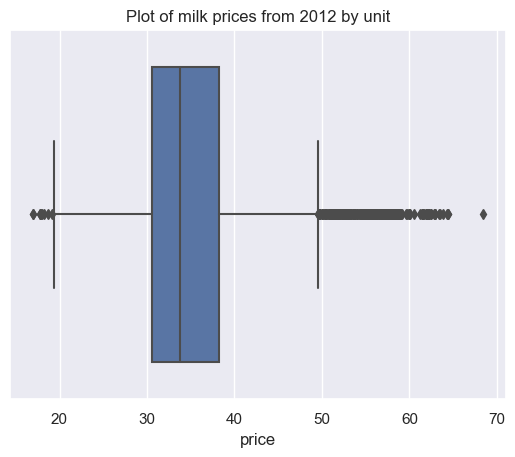

In [105]:
#sns.histplot(data=yr_2012_plus, x="year")
sns.boxplot(data=yr_2012_plus, x='price',hue='unit')
plt.title("Plot of milk prices from 2012 by unit")

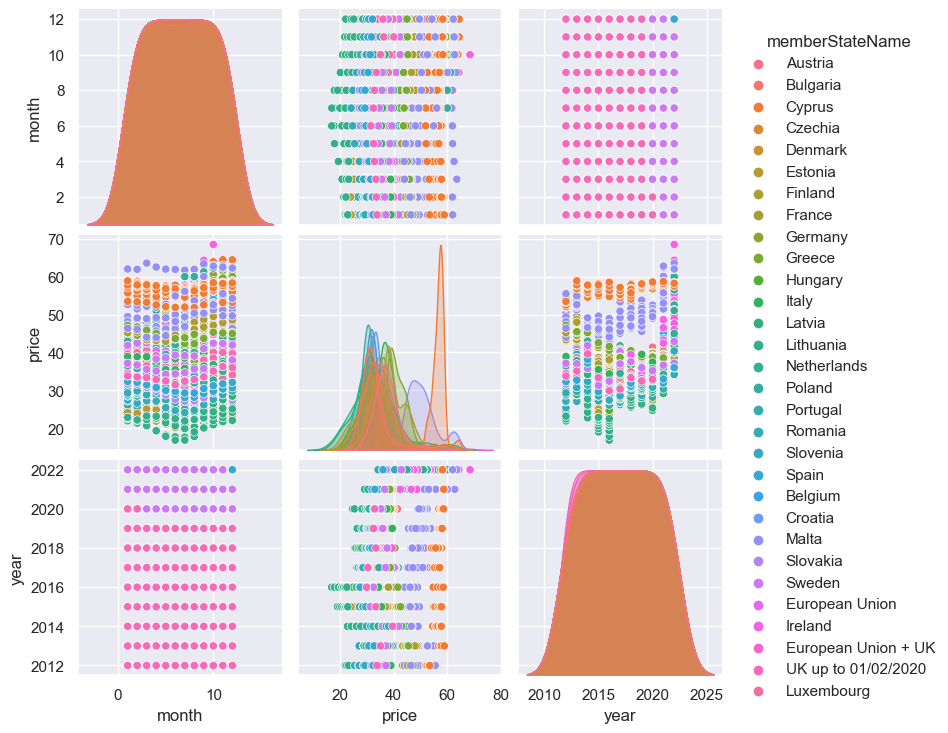

In [106]:
sns.pairplot(data=yr_2012_plus, hue='memberStateName')

### Statistics section

Analysis of statistical data